In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow . keras . models import Sequential
from tensorflow . keras . layers import Dense
from tensorflow . keras . layers import Dropout
from sklearn.model_selection import cross_val_predict

In [2]:
df = pd.read_csv('mc-chic1.csv')

In [3]:
df.head()

,Unnamed: 0,ep,eta,p,phi,pol,pt,qp,tx,ty,zV
0,0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975
1,1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975
2,2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975
3,3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975
4,4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373


In [4]:
col_lengths = df.apply(lambda x: len(x))
print(col_lengths)

Unnamed: 0    208984
ep            208984
eta           208984
p             208984
phi           208984
pol           208984
pt            208984
qp            208984
tx            208984
ty            208984
zV            208984
dtype: int64


In [5]:
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

Empty DataFrame
Columns: [Unnamed: 0, ep, eta, p, phi, pol, pt, qp, tx, ty, zV]
Index: []


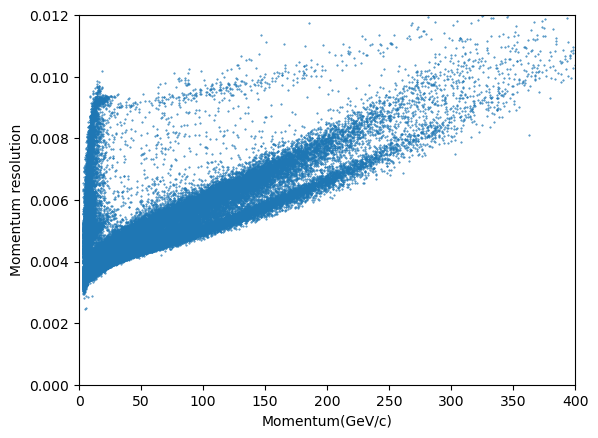

In [6]:
plt.scatter(df['p'] , df['ep'], s= 0.2)
plt.xlabel('Momentum(GeV/c)')
plt.ylabel('Momentum resolution')
plt.xlim(0, 400)
plt.ylim(0, 0.012)
plt.show()

### Exercise 2

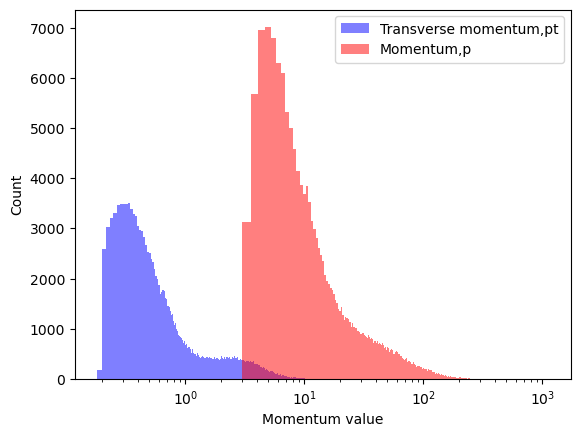

In [8]:
plt.hist(df['pt'], bins=2000, alpha=0.5,  color = 'blue')
plt.hist(df['p'] ,bins=2000, alpha=0.5,  color = 'red')
plt.xscale('log')

# Add labels and a legend
plt.xlabel('Momentum value')
plt.ylabel('Count')
plt.legend(['Transverse momentum,pt', 'Momentum,p'])

# Display the plot
plt.show()

In [9]:
df_copy = df.copy()

In [10]:
p = df['p']
p_val = p.values
pt = df['pt']
pt_val = pt.values
ep = df['ep']
ep_val = ep.values
pz = np.sqrt(np.square(p_val)-np.square(pt_val))
epz = np.multiply(ep_val, np.divide(p_val,pz))



In [11]:
df = df.assign(pz= pz)
df = df.assign(epz=epz)

In [12]:
df.head()

,Unnamed: 0,ep,eta,p,phi,pol,pt,qp,tx,ty,zV,pz,epz
0,0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975,71.845851,0.005477
1,1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975,37.627791,0.004052
2,2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975,18.536851,0.003908
3,3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975,8.617790,0.003866
4,4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373,43.242050,0.004989


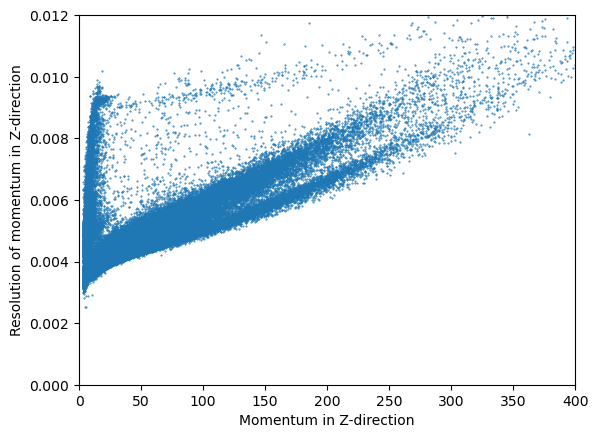

In [13]:
plt.scatter( df['pz'],df['epz'], s= 0.2)
plt.xlabel('Momentum in Z-direction')
plt.ylabel('Resolution of momentum in Z-direction')
plt.xlim(0, 400)
plt.ylim(0, 0.012)
plt.show()

In [15]:
data = df[['p','tx','ty','eta','phi']].copy()
target = df['ep'].copy()

In [16]:
data.head()

,p,tx,ty,eta,phi
0,72.079880,0.077296,0.023467,3.210803,0.294754
1,37.638340,0.023588,-0.002100,4.436362,-0.088796
2,18.565832,0.053102,0.017594,3.577396,0.319936
3,8.632520,0.057089,0.012736,3.532860,0.219504
4,43.359665,0.055445,-0.048714,3.300828,-0.720869


In [17]:
target.head()

0    0.005459
1    0.004050
2    0.003901
3    0.003859
4    0.004975
Name: ep, dtype: float64

### Exercise 3

In [19]:
num_inputs = 5; num_outputs = 1
num_nodes = num_inputs

In [39]:
def simple_model():
    # create model
    model = Sequential ()
    # no activation required for the output , as this is a regression problem ,
    # ie . we need a numerical prediction for any input
    model.add(Dense (num_nodes , input_dim = num_inputs , kernel_initializer='normal', activation ='relu' ))
    model.add(Dropout (0.2))
    model.add(Dense ( num_outputs , kernel_initializer='normal'))
    # Compile model
    model.compile( loss ='mean_squared_error',optimizer= 'adam')
    return model

In [21]:
def dense_model():
    # create model
    model = Sequential ()
    # no activation required for the output , as this is a regression problem ,
    # ie . we need a numerical prediction for any input
    model.add( Dense (num_nodes , input_dim = num_inputs , kernel_initializer='normal', activation ='relu' ))
    model.add( Dropout (0.2))
    model.add( Dense (4, kernel_initializer='normal', activation ='relu' ))
    model.add( Dropout (0.2))
    model.add( Dense ( num_outputs , kernel_initializer='normal'))
    # Compile model
    model.compile( loss ='mean_squared_error',optimizer= 'adam')
    return model

In [22]:
def wider_model():
    # create model
    model = Sequential ()
    # no activation required for the output , as this is a regression problem ,
    # ie . we need a numerical prediction for any input
    model.add( Dense (num_nodes*2 , input_dim = num_inputs , kernel_initializer='normal', activation ='relu' ))
    model.add( Dropout (0.2))
    model.add( Dense ( num_outputs , kernel_initializer='normal'))
    # Compile model
    model.compile( loss ='mean_squared_error',optimizer= 'adam')
    return model

In [34]:
def regressor(model):
    N_epochs = 10
    batchSize = 1000
    # must always set the random seed for reproducibility
    Answer_to_all_questions = 42
    np.random.seed(Answer_to_all_questions)
    estimator = KerasRegressor (build_fn = model , epochs = N_epochs , batch_size = batchSize, verbose = 1 )
    kfold = KFold ( n_splits =10 , random_state = Answer_to_all_questions , shuffle = True )
    # data and target are 5 - column and 1 - column arrays produced with pandas . DataFrame . values
    results = cross_val_score( estimator , data , target , cv = kfold , scoring = 'r2')
    return results

In [46]:
def standardise_regressor(model):
    # must always set the random seed for reproducibility
    N_epochs = 10
    batchSize = 1000
    Answer_to_all_questions = 42
    np.random.seed(Answer_to_all_questions)
    estimators = []
    estimators.append(( 'standardize',StandardScaler()))
    estimators.append(( 'mlp' , KerasRegressor(build_fn = model, epochs = N_epochs , batch_size = batchSize )))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits =10 , random_state = Answer_to_all_questions , shuffle = True )
    # data and target are 5 - column and 1 - column arrays produced with pandas . DataFrame . values
    results = cross_val_score( pipeline , data , target , cv = kfold , scoring = 'r2')
    return results

In [36]:
test1 = regressor(simple_model)

Epoch 1/10


C:\Users\boazm\AppData\Local\Temp\ipykernel_14788\2995250259.py:7: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor (build_fn = model , epochs = N_epochs , batch_size = batchSize, verbose = 1 )


189/189 [==============================] - 1s 1ms/step - loss: 5.8404e-04
Epoch 2/10
189/189 [==============================] - 0s 1ms/step - loss: 2.4282e-06
Epoch 3/10
189/189 [==============================] - 0s 1ms/step - loss: 1.0500e-06
Epoch 4/10
189/189 [==============================] - 0s 1ms/step - loss: 1.0029e-06
Epoch 5/10
189/189 [==============================] - 0s 1ms/step - loss: 9.9890e-07
Epoch 6/10
189/189 [==============================] - 0s 1ms/step - loss: 9.9538e-07
Epoch 7/10
189/189 [==============================] - 0s 1ms/step - loss: 9.9297e-07
Epoch 8/10
189/189 [==============================] - 0s 1ms/step - loss: 9.9300e-07
Epoch 9/10
189/189 [==============================] - 0s 1ms/step - loss: 9.8867e-07
Epoch 10/10
21/21 [==============================] - 0s 1ms/step
Epoch 1/10
189/189 [==============================] - 1s 1ms/step - loss: 1.7385e-04
Epoch 2/10
189/189 [==============================] - 0s 1ms/step - loss: 1.9926e-06
Epoch 3/10


189/189 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 2/10
189/189 [==============================] - 0s 2ms/step - loss: 2.8558e-05
Epoch 3/10
189/189 [==============================] - 0s 2ms/step - loss: 1.3456e-06
Epoch 4/10
189/189 [==============================] - 0s 2ms/step - loss: 5.4624e-07
Epoch 5/10
189/189 [==============================] - 0s 2ms/step - loss: 5.0257e-07
Epoch 6/10
189/189 [==============================] - 0s 2ms/step - loss: 4.9605e-07
Epoch 7/10
189/189 [==============================] - 0s 2ms/step - loss: 4.9557e-07
Epoch 8/10
189/189 [==============================] - 0s 2ms/step - loss: 4.9658e-07
Epoch 9/10
189/189 [==============================] - 0s 2ms/step - loss: 4.9462e-07
Epoch 10/10
21/21 [==============================] - 0s 1ms/step


In [37]:
print("Mean r value is: %.2f. The standard deviation of the r values is  %.2f" % (test1.mean(),test1.std()))

Mean r value is: 0.50. The standard deviation of the r values is  0.24


In [47]:
test2 = standardise_regressor(simple_model)

Epoch 1/10


C:\Users\boazm\AppData\Local\Temp\ipykernel_14788\2871449025.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(( 'mlp' , KerasRegressor(build_fn = model, epochs = N_epochs , batch_size = batchSize )))


189/189 [==============================] - 1s 1ms/step - loss: 4.1960e-06
Epoch 2/10
189/189 [==============================] - 0s 1ms/step - loss: 7.6320e-07
Epoch 3/10
189/189 [==============================] - 0s 1ms/step - loss: 7.2060e-07
Epoch 4/10
189/189 [==============================] - 0s 1ms/step - loss: 7.0491e-07
Epoch 5/10
189/189 [==============================] - 0s 1ms/step - loss: 6.9096e-07
Epoch 6/10
189/189 [==============================] - 0s 1ms/step - loss: 6.8318e-07
Epoch 7/10
189/189 [==============================] - 0s 1ms/step - loss: 6.7100e-07
Epoch 8/10
189/189 [==============================] - 0s 1ms/step - loss: 6.5633e-07
Epoch 9/10
189/189 [==============================] - 0s 1ms/step - loss: 6.4858e-07
Epoch 10/10
21/21 [==============================] - 0s 950us/step
Epoch 1/10
189/189 [==============================] - 1s 1ms/step - loss: 1.9222e-05
Epoch 2/10
189/189 [==============================] - 0s 1ms/step - loss: 1.4342e-06
Epoch 3/1

189/189 [==============================] - 1s 1ms/step - loss: 1.4683e-06
Epoch 2/10
189/189 [==============================] - 0s 1ms/step - loss: 5.4330e-07
Epoch 3/10
189/189 [==============================] - 0s 1ms/step - loss: 4.8353e-07
Epoch 4/10
189/189 [==============================] - 0s 1ms/step - loss: 4.2809e-07
Epoch 5/10
189/189 [==============================] - 0s 1ms/step - loss: 3.9974e-07
Epoch 6/10
189/189 [==============================] - 0s 1ms/step - loss: 3.9276e-07
Epoch 7/10
189/189 [==============================] - 0s 1ms/step - loss: 3.8662e-07
Epoch 8/10
189/189 [==============================] - 0s 1ms/step - loss: 3.8067e-07
Epoch 9/10
189/189 [==============================] - 0s 1ms/step - loss: 3.7607e-07
Epoch 10/10
21/21 [==============================] - 0s 1ms/step


In [48]:
print("Mean r value is: %.2f. The standard deviation of the r values is  %.2f" % (test2.mean(),test2.std()))

Mean r value is: 0.70. The standard deviation of the r values is  0.06


 The new estimator with standardised inputs performs better than the estimated that uses the raw input data.   The r2 scoring value represents the proportion of variance in the dependent variable that can be explained by the independent variables in the model. The closer the value of r2 to 1, the more the model perfectly explains the variation in the dependent variable. Since I obtained an r2 value of 0.70 with the standardise input, compared to the r2 value of 0.5 withh the raw input, the remaining analysis will be done with standardise input. 

### denser model

In [50]:
test3 = standardise_regressor(dense_model)

Epoch 1/10


C:\Users\boazm\AppData\Local\Temp\ipykernel_14788\2871449025.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(( 'mlp' , KerasRegressor(build_fn = model, epochs = N_epochs , batch_size = batchSize )))


189/189 [==============================] - 1s 2ms/step - loss: 1.1082e-06
Epoch 2/10
189/189 [==============================] - 0s 2ms/step - loss: 5.0218e-07
Epoch 3/10
189/189 [==============================] - 0s 2ms/step - loss: 4.7042e-07
Epoch 4/10
189/189 [==============================] - 0s 2ms/step - loss: 4.5864e-07
Epoch 5/10
189/189 [==============================] - 0s 2ms/step - loss: 4.5130e-07
Epoch 6/10
189/189 [==============================] - 0s 2ms/step - loss: 4.4426e-07
Epoch 7/10
189/189 [==============================] - 0s 2ms/step - loss: 4.4123e-07
Epoch 8/10
189/189 [==============================] - 0s 2ms/step - loss: 4.3979e-07
Epoch 9/10
189/189 [==============================] - 0s 2ms/step - loss: 4.4319e-07
Epoch 10/10
21/21 [==============================] - 0s 1ms/step
Epoch 1/10
189/189 [==============================] - 1s 2ms/step - loss: 1.1632e-06
Epoch 2/10
189/189 [==============================] - 0s 2ms/step - loss: 5.8185e-07
Epoch 3/10


189/189 [==============================] - 1s 2ms/step - loss: 1.2096e-06
Epoch 2/10
189/189 [==============================] - 0s 2ms/step - loss: 6.2928e-07
Epoch 3/10
189/189 [==============================] - 0s 2ms/step - loss: 5.5135e-07
Epoch 4/10
189/189 [==============================] - 0s 2ms/step - loss: 5.1256e-07
Epoch 5/10
189/189 [==============================] - 0s 2ms/step - loss: 5.2083e-07
Epoch 6/10
189/189 [==============================] - 0s 2ms/step - loss: 5.1412e-07
Epoch 7/10
189/189 [==============================] - 0s 3ms/step - loss: 5.1918e-07
Epoch 8/10
189/189 [==============================] - 0s 2ms/step - loss: 5.1434e-07
Epoch 9/10
189/189 [==============================] - 0s 2ms/step - loss: 5.0761e-07
Epoch 10/10
21/21 [==============================] - 0s 2ms/step


In [51]:
print("Mean r value is: %.2f. The standard deviation of the r values is  %.2f" % (test3.mean(),test3.std()))

Mean r value is: 0.67. The standard deviation of the r values is  0.02


### Wider model

In [53]:
test4 = standardise_regressor(wider_model)

Epoch 1/10


C:\Users\boazm\AppData\Local\Temp\ipykernel_14788\2871449025.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(( 'mlp' , KerasRegressor(build_fn = model, epochs = N_epochs , batch_size = batchSize )))


189/189 [==============================] - 1s 1ms/step - loss: 1.0589e-05
Epoch 2/10
189/189 [==============================] - 0s 2ms/step - loss: 6.1581e-07
Epoch 3/10
189/189 [==============================] - 0s 1ms/step - loss: 4.9382e-07
Epoch 4/10
189/189 [==============================] - 0s 1ms/step - loss: 4.5495e-07
Epoch 5/10
189/189 [==============================] - 0s 2ms/step - loss: 4.3227e-07
Epoch 6/10
189/189 [==============================] - 0s 2ms/step - loss: 4.1478e-07
Epoch 7/10
189/189 [==============================] - 0s 2ms/step - loss: 4.0172e-07
Epoch 8/10
189/189 [==============================] - 0s 1ms/step - loss: 3.9494e-07
Epoch 9/10
189/189 [==============================] - 0s 2ms/step - loss: 3.8843e-07
Epoch 10/10
21/21 [==============================] - 0s 2ms/step
Epoch 1/10
189/189 [==============================] - 1s 2ms/step - loss: 1.1224e-05
Epoch 2/10
189/189 [==============================] - 0s 2ms/step - loss: 5.9034e-07
Epoch 3/10


189/189 [==============================] - 1s 2ms/step - loss: 9.7262e-06
Epoch 2/10
189/189 [==============================] - 0s 2ms/step - loss: 5.9179e-07
Epoch 3/10
189/189 [==============================] - 0s 2ms/step - loss: 4.6234e-07
Epoch 4/10
189/189 [==============================] - 0s 2ms/step - loss: 4.2650e-07
Epoch 5/10
189/189 [==============================] - 0s 2ms/step - loss: 4.1587e-07
Epoch 6/10
189/189 [==============================] - 0s 2ms/step - loss: 4.0866e-07
Epoch 7/10
189/189 [==============================] - 0s 2ms/step - loss: 3.9867e-07
Epoch 8/10
189/189 [==============================] - 0s 2ms/step - loss: 3.9421e-07
Epoch 9/10
189/189 [==============================] - 0s 3ms/step - loss: 3.8342e-07
Epoch 10/10
21/21 [==============================] - 0s 2ms/step


In [54]:
print("Mean r value is: %.2f. The standard deviation of the r values is  %.2f" % (test4.mean(),test4.std()))

Mean r value is: 0.72. The standard deviation of the r values is  0.01


   |Model|r2 value|
    |---|---|
    |Simple model with raw input|0.50|
    |Simple model with standardise input|0.70|
    |Dense model with standardise input|0.67|
    |Wider model with standardise input|0.72|
    
The best model so far is the single-layer model with twice the number of nodes in the hidden compsred compared to the input layer


### Exercise 5

In [85]:
def creative_model():
    # create model
    model = Sequential ()
    # no activation required for the output , as this is a regression problem ,
    # ie . we need a numerical prediction for any input
    model.add( Dense (num_nodes*3 , input_dim = num_inputs , kernel_initializer='normal', activation ='relu' ))
    model.add( Dropout (0.2))
    model.add( Dense ( num_outputs , kernel_initializer='normal'))
    # Compile model
    model.compile( loss ='mean_squared_error',optimizer= 'adam')
    return model

In [86]:
def creative_regressor(model):
    # must always set the random seed for reproducibility
    N_epochs = 30
    batchSize = 1000
    Answer_to_all_questions = 42
    np.random.seed(Answer_to_all_questions)
    estimators = []
    estimators.append(( 'standardize',StandardScaler()))
    estimators.append(( 'mlp' , KerasRegressor(build_fn = model, epochs = N_epochs , batch_size = batchSize )))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits =10 , random_state = Answer_to_all_questions , shuffle = True )
    # data and target are 5 - column and 1 - column arrays produced with pandas . DataFrame . values
    results = cross_val_score( pipeline , data , target , cv = kfold , scoring = 'r2')
    predicted = cross_val_predict(pipeline, data, target, cv=kfold)
    return results, predicted

In [87]:
results, predicted = creative_regressor(creative_model)

C:\Users\boazm\AppData\Local\Temp\ipykernel_14788\34372907.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(( 'mlp' , KerasRegressor(build_fn = model, epochs = N_epochs , batch_size = batchSize )))


Epoch 1/30
189/189 [==============================] - 2s 3ms/step - loss: 2.6440e-05
Epoch 2/30
189/189 [==============================] - 1s 3ms/step - loss: 1.3716e-06
Epoch 3/30
189/189 [==============================] - 1s 3ms/step - loss: 6.7958e-07
Epoch 4/30
189/189 [==============================] - 1s 3ms/step - loss: 5.1401e-07
Epoch 5/30
189/189 [==============================] - 1s 3ms/step - loss: 4.5892e-07
Epoch 6/30
189/189 [==============================] - 1s 3ms/step - loss: 4.1763e-07
Epoch 7/30
189/189 [==============================] - 1s 3ms/step - loss: 3.9092e-07
Epoch 8/30
189/189 [==============================] - 1s 3ms/step - loss: 3.7465e-07
Epoch 9/30
189/189 [==============================] - 1s 3ms/step - loss: 3.6203e-07
Epoch 10/30
189/189 [==============================] - 1s 3ms/step - loss: 3.5670e-07
Epoch 11/30
189/189 [==============================] - 1s 3ms/step - loss: 3.4931e-07
Epoch 12/30
189/189 [==============================] - 1s 3ms/s

189/189 [==============================] - 1s 3ms/step - loss: 4.0189e-07
Epoch 5/30
189/189 [==============================] - 1s 4ms/step - loss: 3.7952e-07
Epoch 6/30
189/189 [==============================] - 1s 3ms/step - loss: 3.6427e-07
Epoch 7/30
189/189 [==============================] - 1s 4ms/step - loss: 3.5405e-07
Epoch 8/30
189/189 [==============================] - 1s 3ms/step - loss: 3.5293e-07
Epoch 9/30
189/189 [==============================] - 1s 3ms/step - loss: 3.4744e-07
Epoch 10/30
189/189 [==============================] - 1s 3ms/step - loss: 3.4591e-07
Epoch 11/30
189/189 [==============================] - 0s 2ms/step - loss: 3.4339e-07
Epoch 12/30
189/189 [==============================] - 0s 2ms/step - loss: 3.3991e-07
Epoch 13/30
189/189 [==============================] - 1s 3ms/step - loss: 3.3892e-07
Epoch 14/30
189/189 [==============================] - 1s 3ms/step - loss: 3.3795e-07
Epoch 15/30
189/189 [==============================] - 1s 4ms/step - lo

189/189 [==============================] - 1s 3ms/step - loss: 3.7009e-07
Epoch 8/30
189/189 [==============================] - 1s 4ms/step - loss: 3.5855e-07
Epoch 9/30
189/189 [==============================] - 1s 3ms/step - loss: 3.5200e-07
Epoch 10/30
189/189 [==============================] - 1s 3ms/step - loss: 3.4499e-07
Epoch 11/30
189/189 [==============================] - 1s 3ms/step - loss: 3.3982e-07
Epoch 12/30
189/189 [==============================] - 0s 2ms/step - loss: 3.3621e-07
Epoch 13/30
189/189 [==============================] - 0s 2ms/step - loss: 3.3095e-07
Epoch 14/30
189/189 [==============================] - 0s 3ms/step - loss: 3.2929e-07
Epoch 15/30
189/189 [==============================] - 0s 2ms/step - loss: 3.2297e-07
Epoch 16/30
189/189 [==============================] - 1s 3ms/step - loss: 3.2462e-07
Epoch 17/30
189/189 [==============================] - 1s 4ms/step - loss: 3.2068e-07
Epoch 18/30
189/189 [==============================] - 1s 4ms/step -

189/189 [==============================] - 1s 3ms/step - loss: 3.5456e-07
Epoch 11/30
189/189 [==============================] - 1s 3ms/step - loss: 3.4939e-07
Epoch 12/30
189/189 [==============================] - 1s 3ms/step - loss: 3.4900e-07
Epoch 13/30
189/189 [==============================] - 1s 3ms/step - loss: 3.4747e-07
Epoch 14/30
189/189 [==============================] - 1s 3ms/step - loss: 3.4194e-07
Epoch 15/30
189/189 [==============================] - 1s 3ms/step - loss: 3.3972e-07
Epoch 16/30
189/189 [==============================] - 0s 2ms/step - loss: 3.3612e-07
Epoch 17/30
189/189 [==============================] - 0s 2ms/step - loss: 3.3619e-07
Epoch 18/30
189/189 [==============================] - 1s 3ms/step - loss: 3.3457e-07
Epoch 19/30
189/189 [==============================] - 1s 3ms/step - loss: 3.3207e-07
Epoch 20/30
189/189 [==============================] - 1s 4ms/step - loss: 3.3240e-07
Epoch 21/30
189/189 [==============================] - 1s 4ms/step

189/189 [==============================] - 1s 3ms/step - loss: 3.4562e-07
Epoch 14/30
189/189 [==============================] - 1s 3ms/step - loss: 3.4623e-07
Epoch 15/30
189/189 [==============================] - 1s 3ms/step - loss: 3.4021e-07
Epoch 16/30
189/189 [==============================] - 1s 3ms/step - loss: 3.4006e-07
Epoch 17/30
189/189 [==============================] - 1s 3ms/step - loss: 3.3439e-07
Epoch 18/30
189/189 [==============================] - 0s 2ms/step - loss: 3.3354e-07
Epoch 19/30
189/189 [==============================] - 0s 2ms/step - loss: 3.2998e-07
Epoch 20/30
189/189 [==============================] - 0s 2ms/step - loss: 3.2688e-07
Epoch 21/30
189/189 [==============================] - 1s 3ms/step - loss: 3.2680e-07
Epoch 22/30
189/189 [==============================] - 1s 4ms/step - loss: 3.2328e-07
Epoch 23/30
189/189 [==============================] - 1s 4ms/step - loss: 3.2299e-07
Epoch 24/30
189/189 [==============================] - 1s 4ms/step

189/189 [==============================] - 1s 3ms/step - loss: 3.1092e-07
Epoch 17/30
189/189 [==============================] - 0s 3ms/step - loss: 3.0627e-07
Epoch 18/30
189/189 [==============================] - 1s 3ms/step - loss: 3.0739e-07
Epoch 19/30
189/189 [==============================] - 1s 3ms/step - loss: 3.0539e-07
Epoch 20/30
189/189 [==============================] - 1s 4ms/step - loss: 3.0427e-07
Epoch 21/30
189/189 [==============================] - 1s 3ms/step - loss: 3.0439e-07
Epoch 22/30
189/189 [==============================] - 1s 3ms/step - loss: 3.0180e-07
Epoch 23/30
189/189 [==============================] - 1s 3ms/step - loss: 3.0009e-07
Epoch 24/30
189/189 [==============================] - 1s 3ms/step - loss: 2.9910e-07
Epoch 25/30
189/189 [==============================] - 1s 3ms/step - loss: 3.0051e-07
Epoch 26/30
189/189 [==============================] - 1s 4ms/step - loss: 3.0576e-07
Epoch 27/30
189/189 [==============================] - 1s 4ms/step

189/189 [==============================] - 1s 3ms/step - loss: 3.3755e-07
Epoch 20/30
189/189 [==============================] - 1s 3ms/step - loss: 3.4003e-07
Epoch 21/30
189/189 [==============================] - 1s 3ms/step - loss: 3.3457e-07
Epoch 22/30
189/189 [==============================] - 1s 3ms/step - loss: 3.3701e-07
Epoch 23/30
189/189 [==============================] - 1s 3ms/step - loss: 3.3480e-07
Epoch 24/30
189/189 [==============================] - 1s 3ms/step - loss: 3.3583e-07
Epoch 25/30
189/189 [==============================] - 1s 3ms/step - loss: 3.3131e-07
Epoch 26/30
189/189 [==============================] - 1s 3ms/step - loss: 3.3171e-07
Epoch 27/30
189/189 [==============================] - 1s 3ms/step - loss: 3.3191e-07
Epoch 28/30
189/189 [==============================] - 1s 4ms/step - loss: 3.3303e-07
Epoch 29/30
189/189 [==============================] - 1s 3ms/step - loss: 3.2831e-07
Epoch 30/30
21/21 [==============================] - 0s 2ms/step
E

In [88]:
print("Mean r value is: %.2f. The standard deviation of the r values is  %.2f" % (results.mean(),results.std()))

Mean r value is: 0.75. The standard deviation of the r values is  0.02


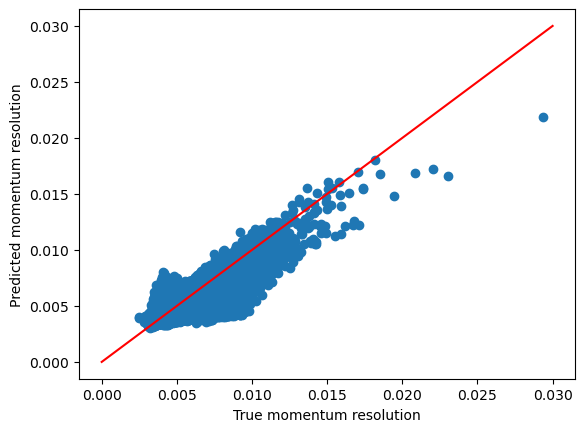

In [89]:
plt.scatter(df['ep'].values , predicted)
x_line = np.linspace(0, 0.03, 50)
y_line = x_line
plt.plot(x_line, y_line, color='r')
plt.xlabel('True momentum resolution')
plt.ylabel('Predicted momentum resolution')
plt.show()

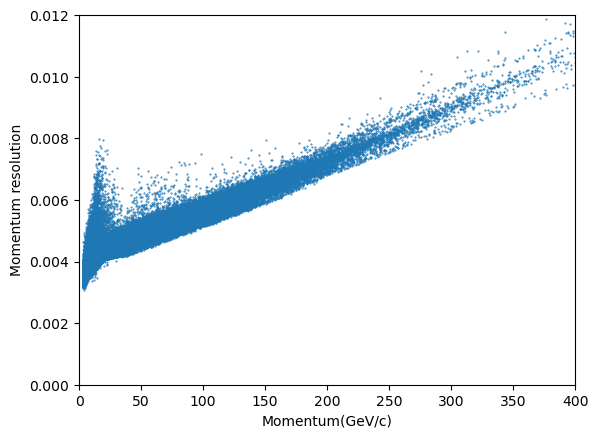

In [90]:
plt.scatter(df['p'].values , predicted, s= 0.2)
plt.xlabel('Momentum(GeV/c)')
plt.ylabel('Momentum resolution')
plt.xlim(0, 400)
plt.ylim(0, 0.012)
plt.show()

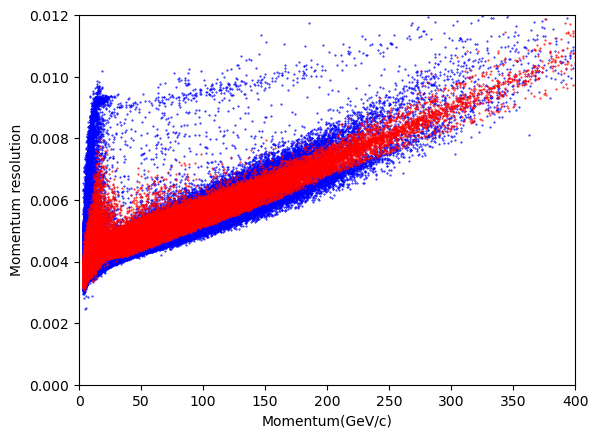

In [91]:
plt.scatter(df['p'] , df['ep'], s= 0.2,color = 'b')
plt.scatter(df['p'].values , predicted, s= 0.2, color='r')
plt.xlabel('Momentum(GeV/c)')
plt.ylabel('Momentum resolution')
plt.xlim(0, 400)
plt.ylim(0, 0.012)
plt.show()